### 순차 데이터와 순환 신경망

#### 순차 데이터
- 순차 데이터(sequential data)는 텍스트나 시계열 데이터(time series data)(일정한 시간간격으로 기록된 데이터)와 같이 순서에 의미가 있는 데이터를 말한다. 예를 들어 "I am a boy"는 쉽게 이해할 수 있지만 "boy am a I"는 말이 되지 않는다. 또 일별 온도를 기록한 데이터에서 날짜 순서를 뒤죽박죽 섞는다면 내일은 온도를 쉽게 예상하기 어렵다.
- 지금까지 우리가 보았던 데이터는 순서와는 상관이 없었다. 예로 패션 MNIST 데이터를 생각해 보자. 이 데이터를 신경망 모델에 전달할 때 샘플을 랜덤하게 섞은 후 훈련 세트와 검증 세트로 나누었다. 즉 샘플의 순서와 전혀 상관이 없었다. 심지어 골고루 섞는 편이 결과가 더 좋다.
- 이는 딥러닝뿐만 아니라 일반적인 머신러닝 모델에서도 마찬가지이다. 앞에서 봤던 생선 데이터나 패션 MNIST 데이터는 어떤 샘플이 먼저 주입되어도 모델의 학습에 큰 영향을 미치지 않는다.
- 이번에 사용하려는 댓글, 즉 텍스트 데이터는 단어의 순서가 중요한 순차 데이터이다. 이런 데이터는 순서를 유지하며 신경망에 주입해야 한다. 단어의 순서를 마구 섞어서 주입하면 안된다.
- 따라서 순차 데이터를 다룰 때는 이전에 입력한 데이터를 기억하는 기능이 필요하다. 예를 들어 "별로지만 추천해요"에서 "추천해요"가 입력될 때 "별로지만"을 기억하고 있어야 이 댓글을 무조건 긍정적이라고 판단하지 않을 것이다.
- 완전 연결 신경망이나 합성곱 신경망은 이런 기억 장치가 없다. 하나의 샘플(또는 하나의 배치)을 사용하여 정방향 계산을 수행하고 나면 그 샘플은 버려지고 다음 샘플을 처리할 때 재사용하지 않는다.
- 이렇게 입력 데이터의 흐름이 앞으로만 전달되는 신경망을 피드포워드 신경망(Feedforward neural network, FFNN)이라고 한다. 완전 연결 신경망과 합성곱 신경망이 모두 피드포워드 신경망에 속한다.
- 신경망이 이전에 처리했던 샘플을 다음 샘플을 처리하는데 재사용하기 위해서는 이렇게 데이터 흐름이 앞으로만 전달되어서는 곤란하다. 다음 샘플을 위해서 이전 데이터가 신경망 층에 순환될 필요가 있다. 이런 신경망이 바로 순환 신경망이다.

#### 순환 신경망
- 순환 신경망(recurrent neural network, RNN)은 일반적인 완전 연결 신경망과 거의 비슷하다. 완전 연결 신경망에 이전 데이터의 처리 흐름을 순환하는 고리 하나만 추가하면 된다. 

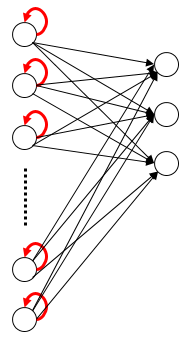

- 은닉층에 있는 붉은 고리를 눈여겨 보자. 뉴런의 출력이 다시 자기 자신으로 전달된다. 즉 어떤 샘플을 처리할 때 바로 이전에 사용했던 데이터를 재사용하는 셈이다. 

- A, B, C 3개의 샘픞을 처리하는 순환 신경망의 뉴런이 있다고 가정해 보자.

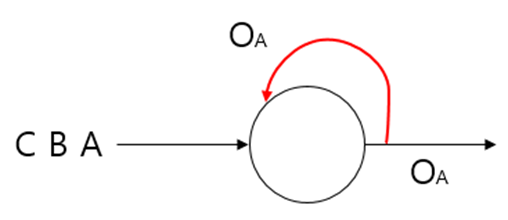

- O는 출력된 결과이다. 첫 번째 샘플 A를 처리하고 난 출력(OA)이 다시 뉴런으로 들어간다. 이 출력에는 A에 대한 정보가 다분히 들어 있을 것이다. 그 다음 B를 처리할 때 앞에서 A를 사용해 만든 출력 OA를 함께 사용한다.

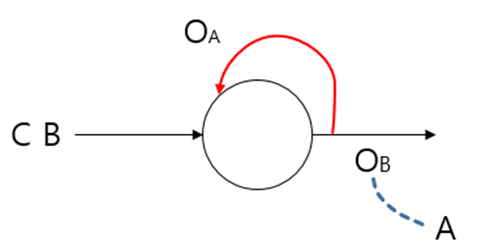

- 따라서 OA와 B를 사용해서 만든 OB에는 A에 대한 정보가 어느 정도 포함되어 있을 것이다. 그 다음 C를 처리할 때는 OB를 함께 사용한다.

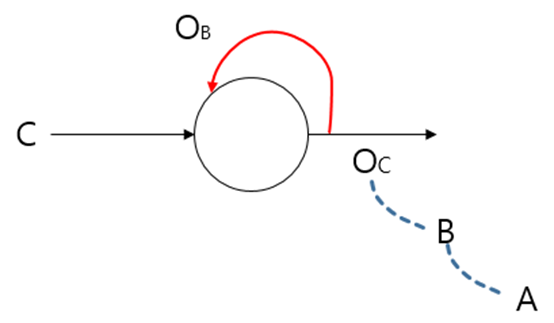

- OB와 C를 사용해 만든 OC에는 어떤 정보들이 포함되어 있을까? OB를 사용했으므로 당연히 B에 대한 정보가 어느정도 포함되어 있을 것이다. 또 OB에는 A에 대한 정보도 포함되어 있다. 따라서 OC에 B와 A에 대한 정보가 담겨 있다고 말할 수 있다.
- OC에는 A에 대한 정보보다는 B에 대한 정보가 더 많을 것이다. 그래서 순환 신경망에서는 "이전 샘플에 대한 기억을 가지고 있다"고 말한다. 이렇게 샘플을 처리하는 한 단계를 타임스텝(timestep)이라고 한다.
- 순환 신경망은 이전 타임스텝의 샘플을 기억하지만 타임스텝이 오래될수록 순환되는 정보는 희미해진다.
- 순환 신경망에서는 특별히 층을 셀(cell)이라고 부른다. 한 셀에는 여러 개의 뉴련이 있지만 완전 연결 신경망과 달리 뉴런을 모두 표시하지 않고 하나의 셀로 층을 표현한다. 또 셀의 출력을 은닉 상태(hidden state)라고 부른다.
- 합성곱 신경망에서처럼 신경망의 구조마다 조금씩 부르는 이름이 다를 수 있다. 하지만 기본 구조는 같다. 입력에 어떤 가중치를 곱하고 활성화 함수를 통과시켜 다음 층으로 보내는 것이다. 달라지는 것은 층의 출력(즉 은닉 상태)을 다음 타임 스텝에 재사용한다는 것 뿐이다.

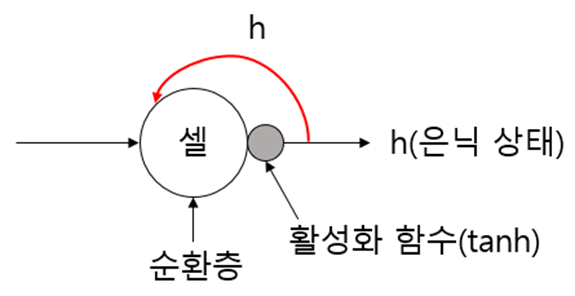

- 일반적으로 은닉층의 활성화 함수로는 하이퍼볼릭 탄젠트(hyperbolic tangent) 함수인 tanh 가 많이 사용된다. tanh 함수도 S자 모양을 띠기 때문에 종종 시그모이드 함수라고 부르기도 한다. tanh 함수는 시그모이드 함수와 달리 -1 ~ 1 사이의 범위를 가진다. (시그모이드 함수는 0 ~ 1 사이의 범위를 가진다.)

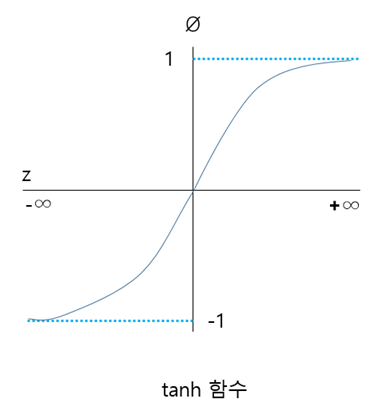

- 다른 신경망과 마찬가지로 순환 신경망 그림에도 번거로움을 피하기 위해 활성화 함수를 표시하지 않는 경우가 많다. 하지만 순환 신경망에도 활성화 함수가 반드시 필요하다는 것을 꼭 기억하자.
- 합성곱 신경망과 같은 피드포워드 신경망에서 뉴런은 입력과 가중치를 곱한다. 순환 신경망에서도 동일하다. 다만 순환 신경망의 뉴런은 가중치가 하나 더 있다. 바로 이전 타임스텝의 은닉 상태에 곱해지는 가중치이다. 셀은 입력과 이전 타임스텝의 은닉 상태를 사용하여 현재 타임스텝의 은닉 상태를 만든다.

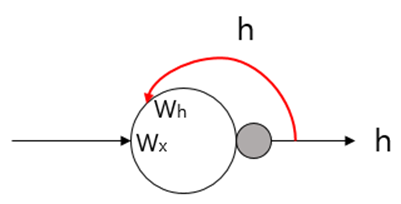

- 위 그림에서 2개의 가중치를 셀 안에 구분해서 표시했다. Wx는 입력에 곱해지는 가중치이고 Wh는 이전 타임스텝의 은닉 상태에 곱해지는 가중치이다. 피드포워드 신경망과 마찬가지로 뉴런마다 하나의 절편이 포함된다.
- 위 그림을 조금 변형해보자. 셀의 출력(은닉 상태)이 다음 타임스텝에 재사용되기 때문에 타임스텝으로 셀을 나누어 그릴 수 있다. 순환 신경망을 타임스텝마다 그릴 수 있는데 이렇게 그린 그림을 보고 셀을 타임스텝으로 펼쳤다고 말한다.

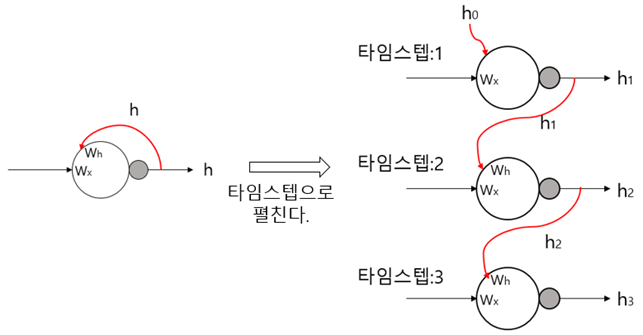

- 타임스텝 1에서 셀의 출력 h1이 타임스텝 2의 셀로 주입된다. 이때 Wh와 곱해진다. 마찬가지로 타임스텝 2에서 셀의 출력 h2가 타임스텝 3의 셀로 주입된다. 이때에도 Wh와 곱해진다.
- 모든 타임스텝에서 사용되는 가중치는 Wh하나라는 점이다. 가중치 Wh는 타임스텝에 따라 변화되는 뉴런의 출력을 학습한다. 이런 능력이 순차 데이터를 다루는데 필요하다.
- 맨 처음 타임스텝 1에서 사용되는 이전 은닉 상태 h0은 이전 타임스텝이 없기 때문에 모두 0으로 초기화된 값을 사용한다.

#### 셀의 가중치와 입출력

- 순환 신경망의 셀에서 필요한 가중치 크기를 계산해 보자. 복잡한 모델을 배울수록 가중치 개수를 계산해 보면 잘 이해하고 있는지 알 수 있다. 예를 들어 순환층에 입력되는 특성의 개수가 4개이고 순환층의 뉴런이 3개라고 가정해 보자.
- 먼저 Wx의 크기를 구해보자. 입력층과 순환층의 뉴런이 모두 완전 연결되기 때문에 가중치 Wx의 크기는 4 * 3 = 12개가 된다.

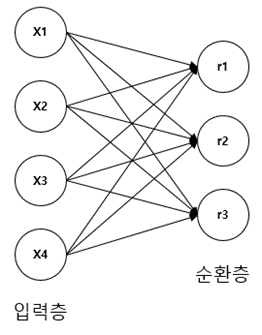

- 순환층에서 다음 타임스텝에 재사용되는 은닉 상태를 위한 가중치 Wh의 크기는 어떻게 될까?

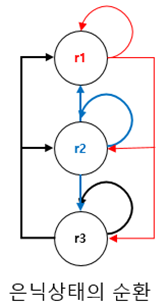

- 순환층에 있는 첫 번째 뉴런(r1)의 은닉 상태가 다음 타임스텝에 재사용될 때 첫 번째 뉴런과 두 번째 뉴런, 세 번째 뉴런에 모두 전달된다. 즉 이전 타임스텝의 은닉 상태는 다음 타임스텝의 뉴런에 완전히 연결된다.
- 두 번재 뉴런의 은닉 상태도 마찬가지로 첫 번째 뉴런과 두 번째 뉴런, 세 번째 뉴런에 모두 전달되고(파란 화살표), 세 번째 뉴런의 은닉 상태도 동일하다(검은 화살표). 따라서 이 순환층에서 은닉 상태를 위한 가중치 Wh는 3 * 3 = 9 개이다.

- 가중치는 모두 구했으니 모델 파라미터 개수를 계산해보자. 가중치에 절편을 더하면 되죠. 여기엔 각 뉴런마다 하나의 절편이 있다. 따라서 이 순환층은 모두 12 + 9 + 3 = 24개의 모델 파라미터를 가지고 있다. 은닉 상태가 모든 뉴런에 순환되기 때문에 완전 연결 신경망처럼 그림으로 표현하기는 너무 어렵다.

- 순환층의 가중치 크기를 알아보았으니 이번에는 순환층의 입력과 출력에 대해 생각해 보자. 합성곱 층의 입력은 전형적으로 하나의 샘플이 3개의 차원을 가진다. 너비, 높이, 채널이다. 입력이 합성곱 층과 풀링 층을 통과하면 너비, 높이, 채널(혹은 깊이)의 크기가 달라지지만 차원의 개수는 그대로 유지되었다.

- 순환층은 일반적으로 샘플마다 2개의 차원을 가진다. 보통 하나의 샘플을 하나의 시퀀스(sequence)라고 말한다. 시퀀스 안에는 여러 개의 아이템이 들어 있다. 시퀀스의 길이가 바로 타임스텝 길이가 된다.

- 예를 들어 어떤 샘플에 "I am a boy"란 문장이 들어 있다고 가정해 보자. 이 샘플은 4개의 단어로 이루어져 있다. 각 단어를 3개의 어떤 숫자로 표현한다고 가정해 보자.

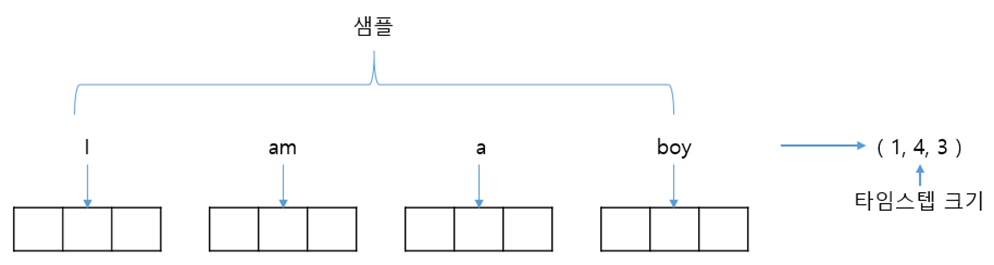

- 이런 입력이 순환층을 통과하면 두 번째, 세 번째 차원이 사라지고 순환층의 뉴런 개수만큼 출력된다. 하나의 샘플은 시퀀스 길이(여기서는 단어 개수)와 단어 표현의 2차원 배열이다. 순환층을 통과하면 1차원 배열로 바뀐다. 이 1차원 배열의 크기는 순환층의 뉴런 개수에 의해 결정된다. 

- 순환층은 기본적으로 마지막 타임스텝의 은닉 상태만 출력으로 내보낸다. 입력된 시퀀스 길이를 모두 읽어서 정보를 마지막 은닉 상태에 압축하여 전달하는 것처럼 볼 수 있다.

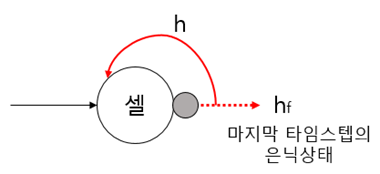

- 순환 신경망도 완전 연결 신경망이나 합성곱 신경망처럼 여러 개의 층을 쌓을 수 있다. 순환층을 여러 개 쌓았을 때는 셀의 출력은 어떻게 달라질까? 셀의 입력은 샘플마다 타임스텝과 단어 표현으로 이루어진 2차원 배열이어야 한다. 따라서 첫 번째 셀이 마지막 타임스텝의 은닉 상태만 출력해서는 안된다. 이런 경우에는 마지막 셀을 제외한 다른 모들 셀은 모든 타임스텝의 은닉 상태를 출력한다. 

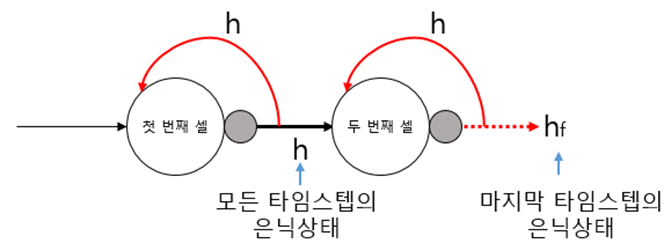

- 첫 번째 셀은 모든 타임스텝의 은닉 상태를 출력하고, 두 번째 셀은 마지막 타임스텝의 은닉 상태만 출력한다.

- 마지막으로 출력층의 구성에 대해 알아보자. 합성곱 신경망과 마찬가지로 순환 신경망도 마지막에는 밀집층을 두어 클래스를 분류한다. 다중 분류일 경우에는 출력층에 클래스 개수만큼 뉴런을 두고 소프트맥스 활성화 함수를 사용한다. 이진 분류일 경우에는 하나의 뉴런을 두고 시그모이드 활성화 함수를 사용한다.
- 합성곱 신경망과 다른 점은 마지막 셀의 출력이 1차원이기 때문에 Flatten 클래스로 펼칠 필요가 없다는 것이다. 셀의 출력을 그대로 밀집층에 사용할 수 있다. 예를 들어 다중 분류 문제에서 입력 샘플의 크기가 (20, 100) 일 경우 하나의 순환층을 사용하는 순환 신경망의 구조는 다음과 같다.

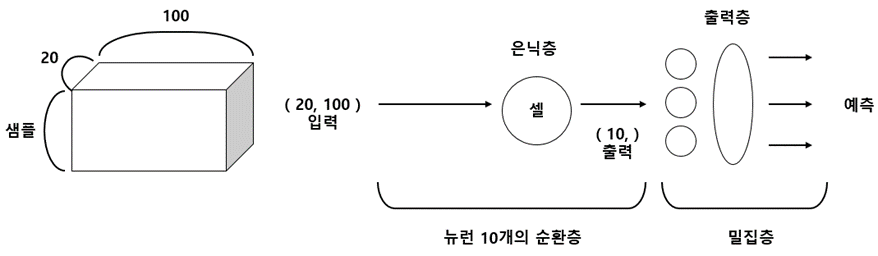

- 위 예에서 샘플은 20개의 타임스텝으로 이루어져 있다. 또 각 타임스텝은 100개의 표현 또는 특성으로 이루어져 있다. 이 샘플이 순환층의 셀을 통과하면 모든 타임스텝을 처리하고 난 후의 은닉 상태만 출력된다. 이 은닉 상태의 크기는 셀에 있는 뉴런의 개수가 되므로 (10, )이다.
- 샘플마다 셀이 1차원 배열을 출력하기 때문에 합성곱 신경망처럼 Flatten 클래스로 펼칠 필요 없이 바로 출력층에 연결할 수 있다. 위 그림은 3개의 클래스를 가진 다중 분류일 경우를 위해 출력층에 3개의 뉴런과 소프트맥스 활성화 함수를 사용한 예이다.